<a href="https://colab.research.google.com/github/Mustafa-Dara-Ozevin/ML_Algorithms_on_Kaggle_Datasets/blob/master/Pima_Indians_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
print(df.shape)
print(df.isnull().sum())

(768, 9)
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


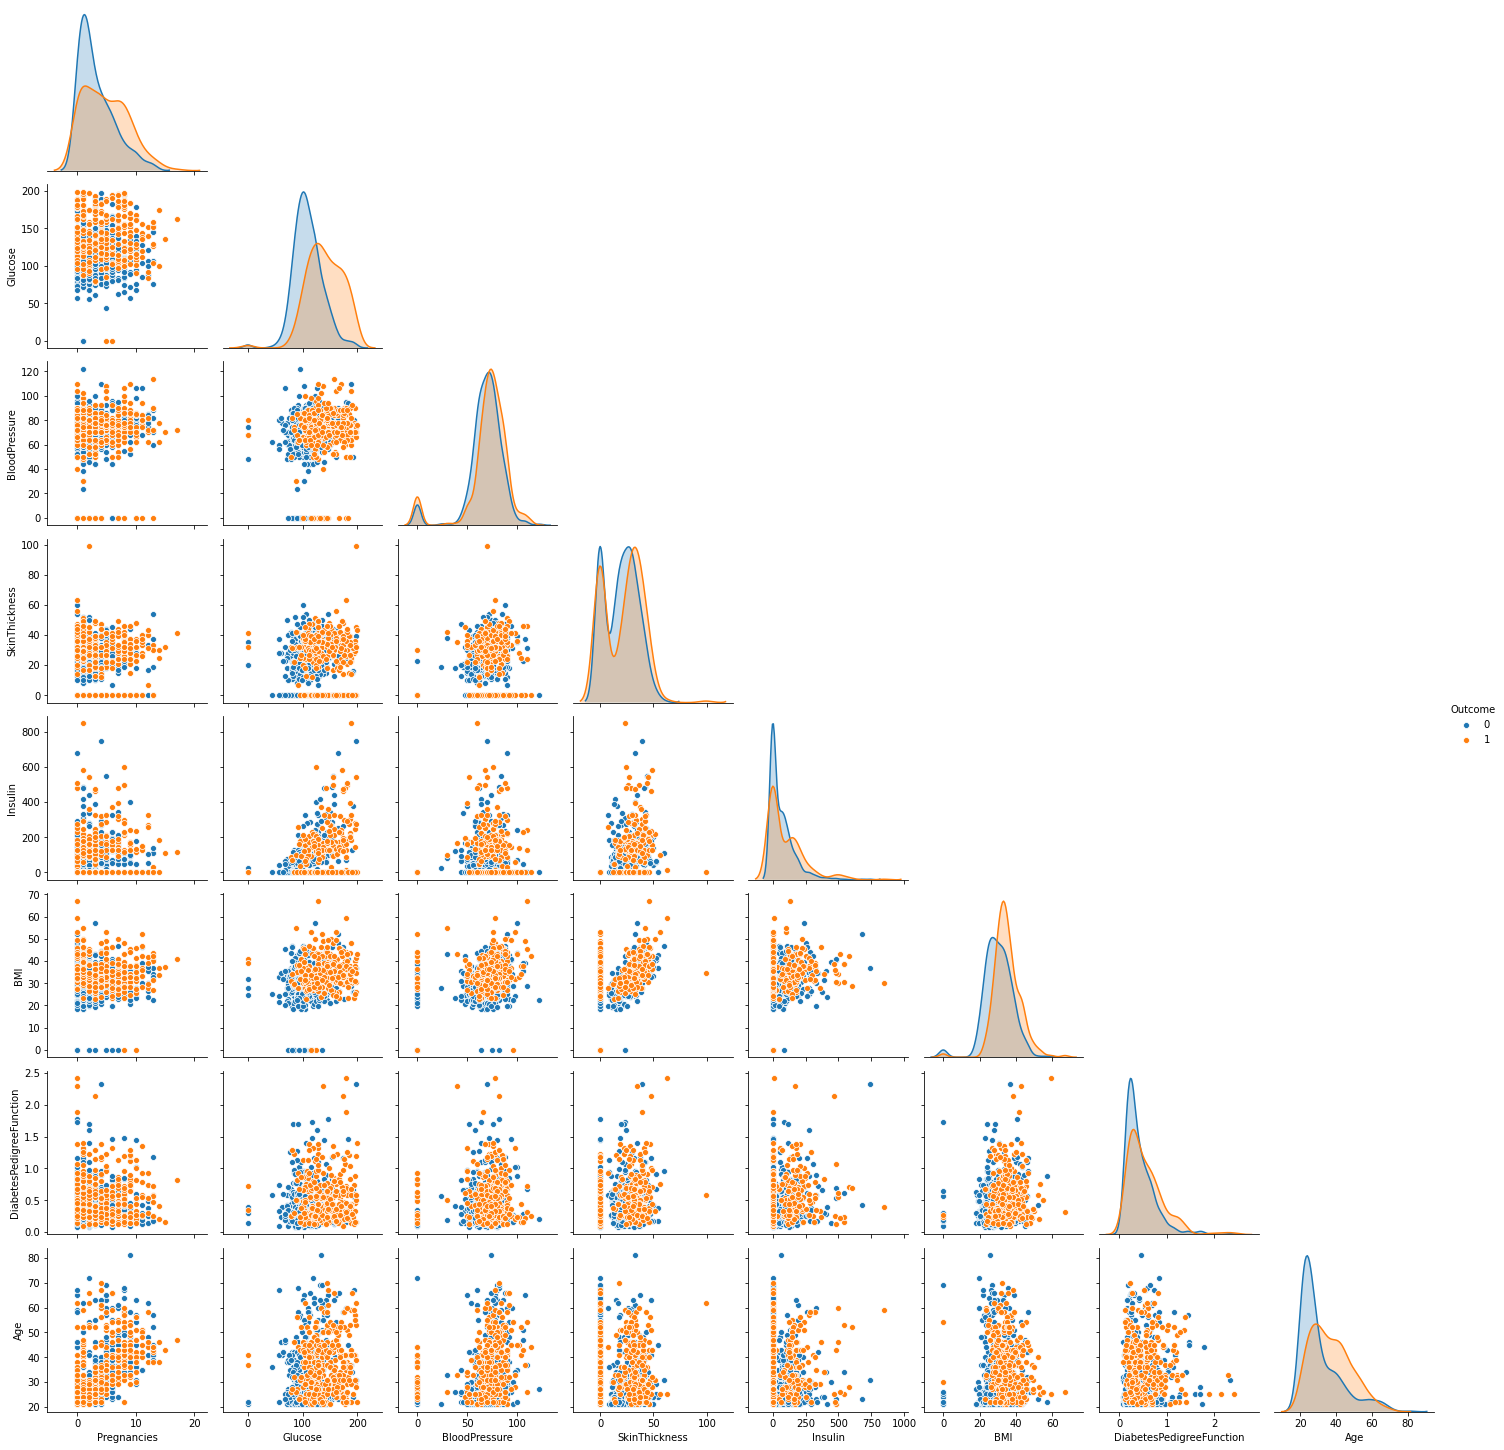

In [38]:
sns.pairplot(df,hue='Outcome',corner=True)

In [42]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
scaler.fit(df.drop(labels='Outcome',axis=1))
diabetes_feautures = pd.DataFrame(scaler.transform(df.drop(labels='Outcome',axis=1)))
diabetes_target = df['Outcome']
diabetes_feautures.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [0]:
def print_results(results):
  print(f'Best Params: {results.best_params_}\n')

  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']
  for mean, std, params in zip(means,stds,results.cv_results_['params']):
    print(f'{round(mean, 3)} (+/-{round(std * 2, 3)}) for {params}')

In [44]:
rfc = RandomForestClassifier( )
params_rfc= { 
    'n_estimators': [50, 100, 200],
    'max_depth': [10,50,100,None]
}

cv_rfc = GridSearchCV(rfc, params_rfc, cv=5, n_jobs=-1)
cv_rfc.fit(diabetes_feautures,diabetes_target)
print_results(cv_rfc)

Best Params: {'max_depth': 50, 'n_estimators': 200}

0.77 (+/-0.068) for {'max_depth': 10, 'n_estimators': 50}
0.753 (+/-0.053) for {'max_depth': 10, 'n_estimators': 100}
0.772 (+/-0.063) for {'max_depth': 10, 'n_estimators': 200}
0.757 (+/-0.057) for {'max_depth': 50, 'n_estimators': 50}
0.764 (+/-0.085) for {'max_depth': 50, 'n_estimators': 100}
0.772 (+/-0.077) for {'max_depth': 50, 'n_estimators': 200}
0.768 (+/-0.07) for {'max_depth': 100, 'n_estimators': 50}
0.77 (+/-0.07) for {'max_depth': 100, 'n_estimators': 100}
0.771 (+/-0.062) for {'max_depth': 100, 'n_estimators': 200}
0.762 (+/-0.077) for {'max_depth': None, 'n_estimators': 50}
0.757 (+/-0.081) for {'max_depth': None, 'n_estimators': 100}
0.758 (+/-0.069) for {'max_depth': None, 'n_estimators': 200}


In [45]:
cv_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
joblib.dump(cv_rfc.best_estimator_,'RandomForest_model.pkl')

['RandomForest_model.pkl']

In [47]:
gbc = GradientBoostingClassifier()
params_gbc ={ # Preparing the parameter combinations to test with GridSearchCV
    'learning_rate':[0.01,0.1,1,10],
    'n_estimators': [100,150,300],
    'max_depth': [3,9,18]
}
cv_gbc = GridSearchCV(gbc,params_gbc,cv=5) # creating the cv object with 5 cross validations
cv_gbc.fit(diabetes_feautures,diabetes_target) # fitting the model
print_results(cv_gbc) # Using print_result function to print results


Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}

0.737 (+/-0.033) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
0.747 (+/-0.063) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
0.764 (+/-0.072) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
0.725 (+/-0.09) for {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100}
0.724 (+/-0.092) for {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 150}
0.737 (+/-0.101) for {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 300}
0.716 (+/-0.104) for {'learning_rate': 0.01, 'max_depth': 18, 'n_estimators': 100}
0.718 (+/-0.091) for {'learning_rate': 0.01, 'max_depth': 18, 'n_estimators': 150}
0.712 (+/-0.086) for {'learning_rate': 0.01, 'max_depth': 18, 'n_estimators': 300}
0.759 (+/-0.069) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.76 (+/-0.058) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
0.759 (+/-0.047) for {'l

In [48]:
cv_gbc.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [49]:
joblib.dump(cv_gbc.best_estimator_,'GraidentBoosting_model.pkl') # Saving the best model with joblib

['GraidentBoosting_model.pkl']

In [50]:
from sklearn.svm import SVC
svc = SVC() # Support vector Classifier
params_svc= { # Preparing the parameter combinations to test with GridSearchCV
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.01, 0.1, 1, 10]
}
cv_svc = GridSearchCV(svc,params_svc,cv=5, n_jobs=-1) # preparing the cv object with 5 cross validations
cv_svc.fit(diabetes_feautures,diabetes_target) # fitting the model
print_results(cv_svc) # Using print_result function to print results

Best Params: {'C': 0.01, 'kernel': 'linear'}

0.775 (+/-0.026) for {'C': 0.01, 'kernel': 'linear'}
0.651 (+/-0.004) for {'C': 0.01, 'kernel': 'rbf'}
0.652 (+/-0.018) for {'C': 0.01, 'kernel': 'poly'}
0.766 (+/-0.045) for {'C': 0.1, 'kernel': 'linear'}
0.75 (+/-0.034) for {'C': 0.1, 'kernel': 'rbf'}
0.72 (+/-0.038) for {'C': 0.1, 'kernel': 'poly'}
0.773 (+/-0.044) for {'C': 1, 'kernel': 'linear'}
0.771 (+/-0.045) for {'C': 1, 'kernel': 'rbf'}
0.749 (+/-0.037) for {'C': 1, 'kernel': 'poly'}
0.773 (+/-0.044) for {'C': 10, 'kernel': 'linear'}
0.771 (+/-0.058) for {'C': 10, 'kernel': 'rbf'}
0.742 (+/-0.022) for {'C': 10, 'kernel': 'poly'}


In [51]:
cv_svc.best_estimator_

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
joblib.dump(cv_svc.best_estimator_,'SVM_model.pkl') # Saving the best model with joblib

['SVM_model.pkl']